In [50]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np



roll = pd.read_csv('Sall_votes.csv')
print(roll.head())

   congress chamber  rollnumber  icpsr  cast_code   prob
0         1  Senate           1    507          1   90.4
1         1  Senate           1   1346          6   48.6
2         1  Senate           1   1536          1   99.8
3         1  Senate           1   2307          1  100.0
4         1  Senate           1   2936          1   99.7


In [ ]:
len(roll['congress'])
max(roll['congress'])


In [2]:

rh = roll
idx = (rh['rollnumber'] == 1) & (rh['congress'] == 1)
rh[idx]

,congress,chamber,rollnumber,icpsr,cast_code,prob
0,1,Senate,1,507,1,90.4
1,1,Senate,1,1346,6,48.6
2,1,Senate,1,1536,1,99.8
3,1,Senate,1,2307,1,100.0
4,1,Senate,1,2936,1,99.7
5,1,Senate,1,2943,1,99.9
6,1,Senate,1,3128,1,19.4
7,1,Senate,1,3771,6,NaN
8,1,Senate,1,3877,1,99.8
9,1,Senate,1,4333,1,98.8


In [3]:
c1 = roll[roll['congress'] == 3]
max(c1['rollnumber'])

# collect max roll number for each congress
maxRolls = {}
for i in range(1, max(roll['congress'])):
    c = roll[roll['congress'] == i]
    maxRolls[i] = max(c['rollnumber'])

        

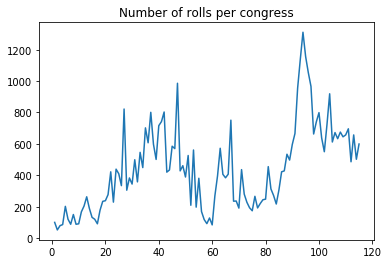

In [51]:
x, y = zip(*maxRolls.items())
if 1:
    plt.plot(x,y)
    plt.title('Number of rolls per congress')
    plt.show()

In [17]:
import RollCodes
rc = RollCodes.rollCodes # grab the data

In [48]:
# calculate the yay nay ratio for n congress
import time

thresh = 75
df = roll[roll['congress'] > thresh]

start = time.time()
ynRat = []

compMin = (((max(df['congress'])-thresh) / 10) * 99) / 60
print('Thinking... (est time', compMin, ') minutes')
for i in range(min(df['congress']),max(df['congress'])):
    c = df[df['congress'] == i]

    yay,nay = 0,0
    for index, row in c.iterrows():
        if row['cast_code'] == 1:
            yay += 1
        elif row['cast_code'] == 6:
            nay += 1
            
    ynRat.append(yay/nay)
    
print('Took:', time.time()-start, 'seconds to run', max(df['congress']))
# takes 99 seconds to run 10
#       252               41 

Took: 252.9785554409027 seconds to run 116


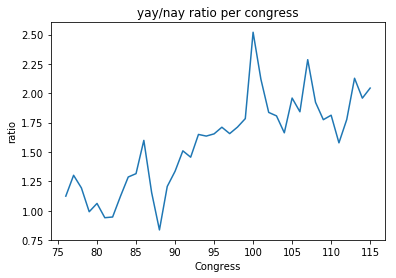

[1.1241386735572783,
 1.3017911456573166,
 1.1941489361702127,
 0.991407574901074,
 1.0621604680317593,
 0.9405786638529461,
 0.946649210375583,
 1.1219934577640946,
 1.2871213065702531,
 1.3157318741450068]

In [49]:
if 1:
    plt.plot(range(min(df['congress']),max(df['congress'])),ynRat)
    plt.title('yay/nay ratio per congress')
    plt.xlabel('Congress')
    plt.ylabel('ratio')
    plt.show()



In [57]:
# Let's grab the names and parties
npty = pd.read_csv('ICPS.csv')
print(npty.head())
len(npty['ICPSR'])

  Congress  ICPSR  State Code  District     state party        name  \
0        1   4998           1         0   CONNECT   500    0JOHNSON   
1        1   2936           1         0   CONNECT   500  0ELLSWORTH   
2        1    507          11         0   DELAWAR   400    0BASSETT   
3        1   7762          11         0   DELAWAR   500       0READ   
4        1   3128          44         0   GEORGIA   400        0FEW   

                        fullName  
0        JOHNSON, WILLIAM SAMUEL  
1              ELLSWORTH, OLIVER  
2               BASSETT, RICHARD  
3                   READ, GEORGE  
4                   FEW, WILLIAM  


9414

In [69]:
def get_name(ipr):
    idx = npty[npty['ICPSR'] == ipr].index.tolist()
    nms = [npty.loc[id_,'name'] for id_ in idx]
    return nms 

def get_party(ipr):
    idx = npty[npty['ICPSR'] == ipr].index.tolist()
    ptys = [npty.loc[id_,'party'] for id_ in idx]
    return ptys
    
# 1536

npty.loc[4,'state']

npty.loc[38,'name']
get_party(2936)
get_name(2936)

['0ELLSWORTH', '0ELLSWORTH', '0ELLSWORTH', '1ELLSWORTH']

In [70]:
# Let's find how one person votes over time

thresh = 110 
df = roll[roll['congress'] > thresh]
df.head()

# grab the votes for the member
memb = 1366
votes = [] #todo dict?
for



,congress,chamber,rollnumber,icpsr,cast_code,prob
3927119,111,Senate,1,1366,1,100.0
3927120,111,Senate,1,4812,1,100.0
3927121,111,Senate,1,10808,9,100.0
3927122,111,Senate,1,14009,1,81.9
3927123,111,Senate,1,14101,9,100.0


In [ ]:
# 



# are you more likely to see a yay after seeing a nay? Vice versa